In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
election_results_url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
def get_page_content(url):
    response = requests.get(url)
    response.raise_for_status()
    return BeautifulSoup(response.content, 'html.parser')
def parse_results_table(soup):
    results = []
    results_table = soup.find("table")
    if not results_table:
        raise ValueError("Could not find the results table on the page.")
    table_rows = results_table.find_all("tr")
    for row in table_rows[1:]:
        columns = row.find_all("td")
        if len(columns) >= 4:
            column_data = [column.text.strip() for column in columns]
            results.append(column_data[:4])
    return results
def save_results_to_csv(results, filename="election_results.csv"):
    results_df = pd.DataFrame(results, columns=["Party", "Won", "Leading", "Total"])
    results_df.to_csv(filename, index=False)
def main():
    soup = get_page_content(election_results_url)
    results = parse_results_table(soup)
    save_results_to_csv(results)
    print("Result data saved to election_results.csv")
if __name__ == "__main__":
    main()

Result data saved to election_results.csv


In [4]:
import pandas as pd
results_filename = "election_results.csv"
election_data = pd.read_csv(results_filename)
election_data['Won'] = pd.to_numeric(election_data['Won'], errors='coerce')
election_data['Leading'] = pd.to_numeric(election_data['Leading'], errors='coerce')
election_data['Total'] = pd.to_numeric(election_data['Total'], errors='coerce')
total_seats_won_by_party = election_data.groupby('Party')['Won'].sum().reset_index().sort_values(by='Won', ascending=False)
election_data['Percentage of Total Seats'] = (election_data['Won'] / election_data['Won'].sum()) * 100
print("\nParty with the highest number of seats won:")
print(total_seats_won_by_party.iloc[0:1])
print("\nTotal number of seats won by the top 5 parties:")
print(total_seats_won_by_party.head(5))
print("\nParty with the highest percentage of seats won:")
print(election_data.loc[election_data['Percentage of Total Seats'].idxmax()][['Party', 'Percentage of Total Seats']])
print("\nParties with at least 5 seats:")
print(election_data[election_data['Won'] >= 5][['Party', 'Won']])
print("\nNumber of parties that won seats:")
print(election_data['Party'].nunique())
print("\nTotal number of seats contested:")
print(election_data['Total'].sum())
print("\nDistribution of seats among the top 3 parties:")
print(total_seats_won_by_party.head(3))


Party with the highest number of seats won:
                          Party  Won
8  Bharatiya Janata Party - BJP  240

Total number of seats won by the top 5 parties:
                                  Party  Won
8          Bharatiya Janata Party - BJP  240
15       Indian National Congress - INC   99
31                 Samajwadi Party - SP   37
4   All India Trinamool Congress - AITC   29
12      Dravida Munnetra Kazhagam - DMK   22

Party with the highest percentage of seats won:
Party                        Bharatiya Janata Party - BJP
Percentage of Total Seats                       44.198895
Name: 0, dtype: object

Parties with at least 5 seats:
                                                Party  Won
0                        Bharatiya Janata Party - BJP  240
1                      Indian National Congress - INC   99
2                                Samajwadi Party - SP   37
3                 All India Trinamool Congress - AITC   29
4                     Dravida Munnetra Kazhagam

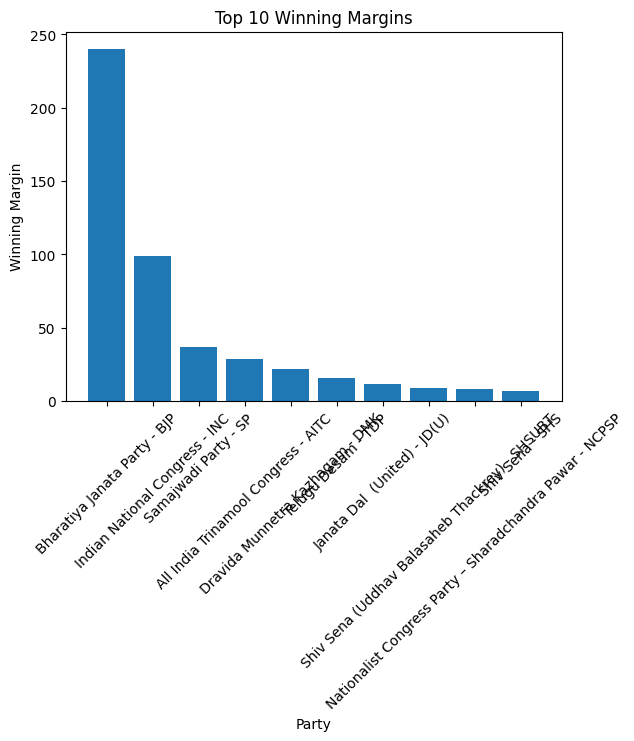

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
results_filename = "election_results.csv"
election_data = pd.read_csv(results_filename)
election_data["Winning_Margin"] = election_data["Won"] - election_data["Leading"]
top_winning_margins = election_data.nlargest(10, "Winning_Margin")
plt.bar(top_winning_margins["Party"], top_winning_margins["Winning_Margin"])
plt.xlabel("Party")
plt.ylabel("Winning Margin")
plt.title("Top 10 Winning Margins")
plt.xticks(rotation=45)
plt.show()

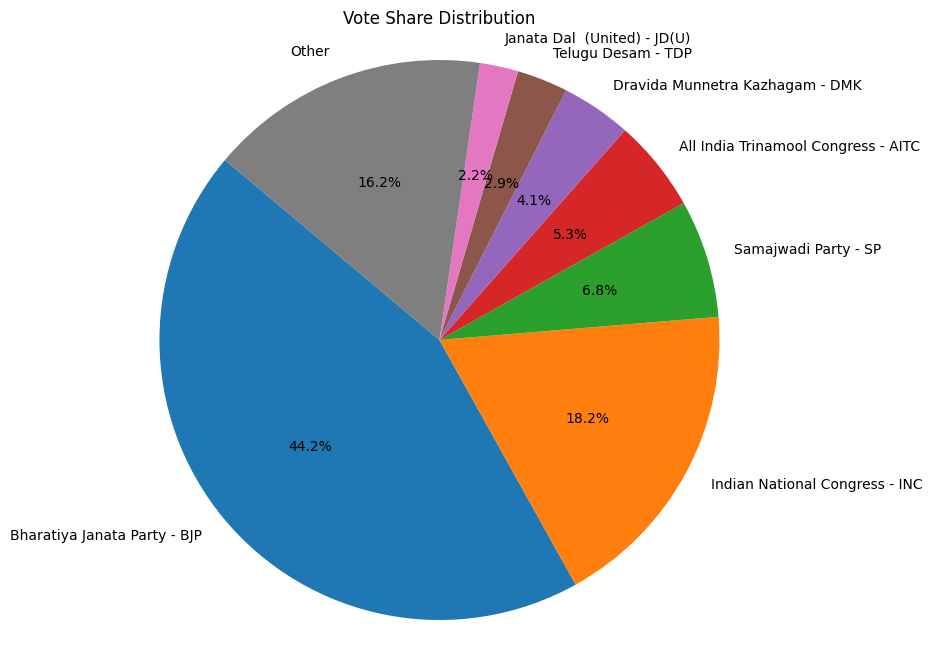

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
results_filename = "election_results.csv"
election_data = pd.read_csv(results_filename)
total_seats_won = election_data["Won"].sum()
election_data["Vote_Share_Percentage"] = (election_data["Won"] / total_seats_won) * 100
top_n_parties = 7
sorted_election_data = election_data.sort_values(by="Vote_Share_Percentage", ascending=False)
major_parties_data = sorted_election_data.head(top_n_parties)
minor_parties_data = sorted_election_data.iloc[top_n_parties:]
other_vote_share = minor_parties_data["Vote_Share_Percentage"].sum()
other_row = pd.DataFrame([["Other", other_vote_share]], columns=["Party", "Vote_Share_Percentage"])
final_major_parties_data = pd.concat([major_parties_data, other_row], ignore_index=True)
plt.figure(figsize=(10, 8))
plt.pie(final_major_parties_data["Vote_Share_Percentage"], labels=final_major_parties_data["Party"], autopct="%1.1f%%", startangle=140)
plt.title("Vote Share Distribution")
plt.axis("equal")
plt.show()

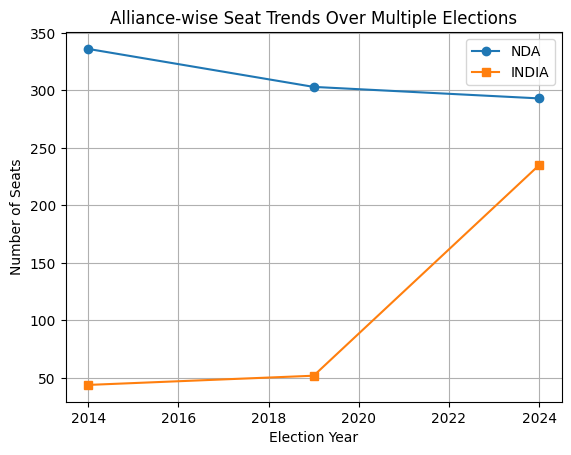

In [7]:
import matplotlib.pyplot as plt
election_years = [2014, 2019, 2024]
nda_seat_counts = [336, 303, 293]
india_seat_counts = [44, 52, 235]
plt.plot(election_years, nda_seat_counts, marker='o', label='NDA')
plt.plot(election_years, india_seat_counts, marker='s', label='INDIA')
plt.xlabel('Election Year')
plt.ylabel('Number of Seats')
plt.title('Alliance-wise Seat Trends Over Multiple Elections')
plt.legend()
plt.grid(True)
plt.show()